# Task 1
## Predict the percentage of students based on no. of study hours

In [79]:
# import all necessary libraries
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [80]:
# read the dataset
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [82]:
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [83]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [84]:
x=df[["Hours"]]
y=df["Scores"]

In [85]:
# split data into training nand testing data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0) 

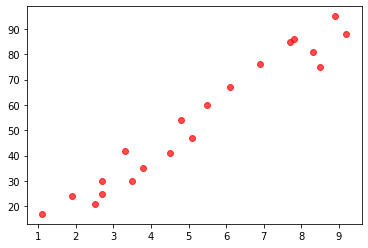

In [86]:
plt.scatter(train_x,train_y,c='red',alpha=0.7)
plt.show()

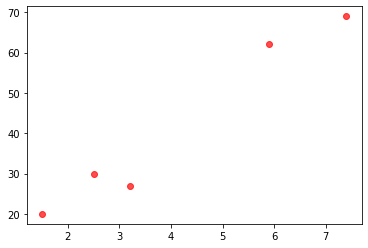

In [87]:
plt.scatter(test_x,test_y,c='red',alpha=0.7)
plt.show()

In [88]:
model=LinearRegression()
model.fit(train_x,train_y)
score=model.score(test_x,test_y)*100
print(f"The model achieved score = {score}")

The model achieved score = 94.54906892105355


## So, after seeing model score we can say that Model is good

In [89]:
ypred=model.predict(test_x)

## Visualization of Comparison b/w Original and Prediction Model

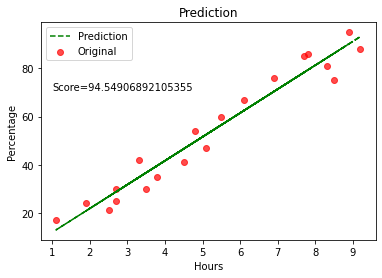

In [90]:
plt.scatter(train_x,train_y,c='red',alpha=0.7,label='Original')
plt.plot(train_x,model.predict(train_x),'g--',label='Prediction')
plt.title('Prediction')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.legend()
plt.text(1,71,f"Score={score}")
plt.show()

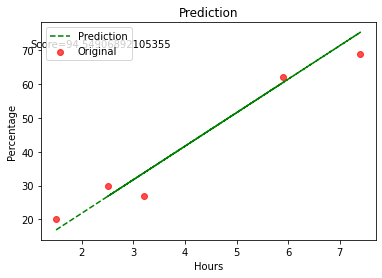

In [91]:
plt.scatter(test_x,test_y,c='red',alpha=0.7,label='Original')
plt.plot(test_x,ypred,'g--',label='Prediction')
plt.title('Prediction')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.legend()
plt.text(1,71,f"Score={score}")
plt.show()

### function to save model for future use 

In [92]:
def save(path,model):
    with open(path,'wb') as f:
        pkl.dump(model,f)
    return path

In [93]:
save("models/percentage_predictor.pkl",model)

'models/percentage_predictor.pkl'

## Prediction of Score with input hours

In [94]:
path = 'models/percentage_predictor.pkl'
with open(path,'rb') as f:
    model = pkl.load(f)

hrs = float(input('Enter Hours'))
# convert single value into 2d array
x = np.array([[hrs]])
ypred1 = model.predict(x)
print(f'No. of Hours = {hrs} \n Percentage = {ypred1[0]}')

No. of Hours = 9.25 
 Percentage = 93.69173248737535


In [95]:
from sklearn.metrics import mean_absolute_error,r2_score

In [96]:
print("Mean Absolute Error=",mean_absolute_error(test_y,ypred))

Mean Absolute Error= 4.183859899002975


In [97]:
print("R2-score=",r2_score(test_y,ypred))

R2-score= 0.9454906892105355


### Higher the R2-score higher the accuracy of model

# Conclusion

## If a student study 9.25hrs/day then he/she will score 93.69 